# CHANGEMENT DE PENTES DANS UNE SERIE

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [96]:
#Serie = [0.067238904, -0.102679881, 0.01940899, -0.131117488, -0.214517613, 0.157258923, 0.036706008, 0.016978233, 0.116067734, 4.743973742, 14.45681545, 19.79653307, 19.63551697, 14.75640964, 14.49508407, 29.57162957, 34.35154035, 24.5891771, 19.5566106, 19.77786917, 19.48045239, 19.39253524, 19.6119075, 19.37288854, 14.46814558, 5.045143817, -0.179989144, 0.028726364, 5.095571357, 9.611555878, 9.782350203, 9.816313554, 4.669270539, 0.168666591, 0.145820734, 0.098501045, 0.227520096, 9.570195928, 19.3275607, 9.893992329, -0.183070026, -0.234127009, 0.009692396, -0.043350227, 0.086534462, 4.940506347, 9.682493476, 9.6797441, 9.912886934, 4.702649696, 0.126017184, 0.067977594, 9.808998855, 19.74575552, 9.908506244, 0.078706378, 9.901372568, 19.48938819, 19.75414373, 19.30717806, 9.715180742, 4.753063059, 14.84621102, 24.5142621, 24.22609497, 9.819711948, 4.860427965, 19.62910875, 29.48940595, 24.46262038, 24.39358348, 29.31943171, 19.67473155, 14.5374882, 29.39737594, 34.29607172, 29.09359081, 29.21900907, 24.33754818, 19.62927235, 24.50864647, 29.55191414, 29.15532645, 29.23586306, 19.69262392, 14.88864931, 29.31430615, 39.08977936, 34.37013456, 29.28457452, 29.09823037, 24.59405531, 19.72552198, 24.28197776, 34.20368783, 38.96958544, 29.5214294, 14.42708676, 19.5855616, 29.42845242, 24.59078733, 29.32780403, 34.19078719, 19.59049443, 14.89861361, 24.50865539, 29.34039008, 24.27815921, 14.78998033, 14.58721547, 29.52443582, 29.56073152, 19.30874611, 19.30472237, 9.912708087, 9.741318791, 29.23817381, 29.24338455, 14.66415896, 14.82204758, 24.32628072, 24.36577297, 19.5338725, 19.51281431, 19.57161821, 19.73853609, 19.5444779, 29.51936609, 29.52085292, 9.840828548, 9.95537852, 19.3793856, 19.70600151, 29.4517574, 29.56955801, 14.7456921, 19.53452657, 24.66074808, 19.7398255, 24.30808533, 19.70857809, 9.841699767, 24.28906266, 33.98590267, 24.36929409, 19.34572709, 9.626587523, 9.854661829, 24.54829185, 19.61713169, 19.73651064, 34.29485221, 24.63946819, 9.679601386, 19.60449283, 24.45146344, 19.30179531, 19.72184805, 14.43924964, 19.42170776, 29.0984513, 19.78242071, 14.57892748, 19.39415279, 14.88312006, 19.55170865]
Serie = np.array([0.067238904, 0.72679881, 0.06940899, 0.071117488, -0.114517613, -0.147258923, -0.176706008, -0.196978233, 19.79653307, 19.63551697, 19.75640964, 19.49508407, 19.7162957, 19.5566106, 19.77786917, 19.48045239, 19.39253524, 19.6119075, 19.37288854, 14.46814558, 9.045143817, 4.179989144, 0.028726364, ]).reshape(-1, 1)
Serie=pd.DataFrame(Serie)

Serie=Serie.reset_index()
Serie.shape

(23, 2)

In [97]:
Serie.columns=['t','serie']

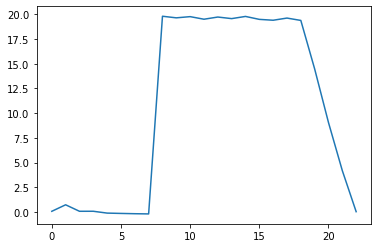

In [98]:
plt.plot(Serie['serie'])

## APPROCHE 1 UTILISER DERIVEES PREMIERES ET SECONDS

In [99]:
from scipy.stats import kurtosis,skew
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import argrelmax
from matplotlib import gridspec

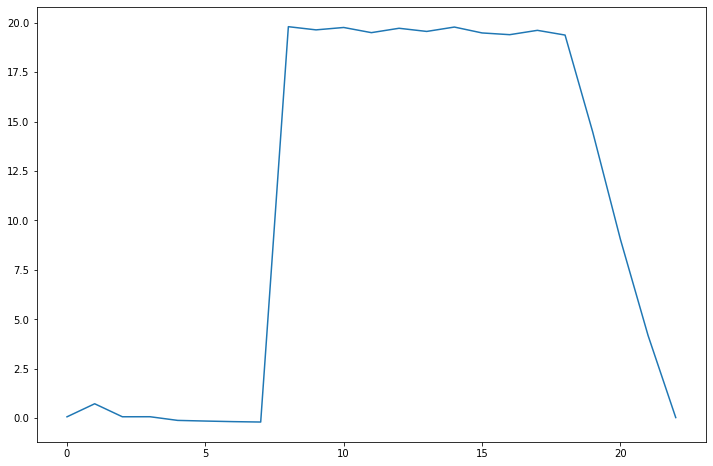

In [100]:
fig = plt.figure(figsize=(12,8))
ax0 = plt.subplot()
ax0.plot(Serie['serie'])

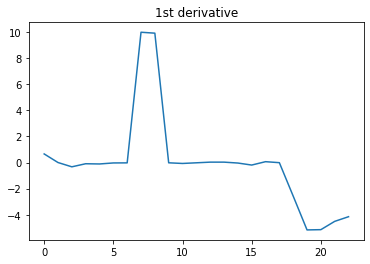

In [101]:
serie_1stdev = np.gradient(Serie['serie'])
ax1 = plt.subplot()
ax1.set_title('1st derivative')
ax1.plot(serie_1stdev)

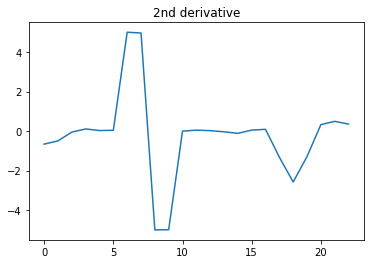

In [102]:
serie_2nddev = np.gradient(serie_1stdev)
ax2 = plt.subplot()
ax2.set_title('2nd derivative')
ax2.plot(serie_2nddev)

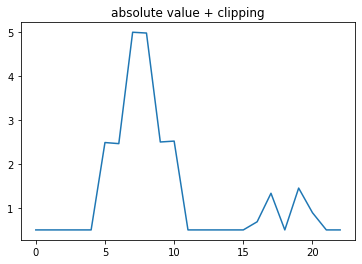

In [114]:
serie_2nddev_seuille = np.clip(np.abs(np.gradient(serie_2nddev)), 0.5,5)
ax3 = plt.subplot()
ax3.set_title('absolute value + clipping')
ax3.plot(serie_2nddev_seuille)

In [115]:
smoothed_signal = gaussian_filter1d(serie_2nddev_seuille, 1)
# identifier maximum local qui correspondent aux chgt de pentes
max_idx = argrelmax(smoothed_signal)[0]
print(max_idx)


[ 8 19]


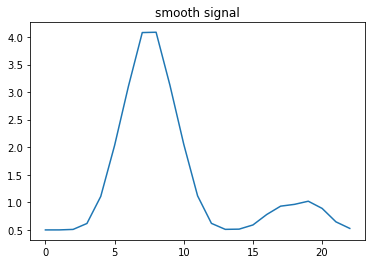

In [116]:
ax4 = plt.subplot()
ax4.set_title('smooth signal')
ax4.plot(smoothed_signal)

In [118]:
# nb de changements
changes=len(argrelmax(smoothed_signal)[0])
changes

2

## APPROCHE 2 SAVGOL
it is better to look for places where the second derivative is large; for example, at least half its maximal size. This will of course return many indexes, but we can then look at the gaps between those indexes to identify where each peak begins and ends. The midpoint of the peak is then easily found.

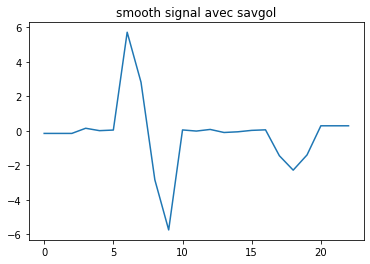

In [122]:
from scipy.signal import savgol_filter
der2=savgol_filter(Serie['serie'], window_length=5, polyorder=2, deriv=2) 
ax4 = plt.subplot()
ax4.set_title('smooth signal avec savgol')
ax4.plot(der2)

KeyError: "None of [Int64Index([7], dtype='int64')] are in the [columns]"

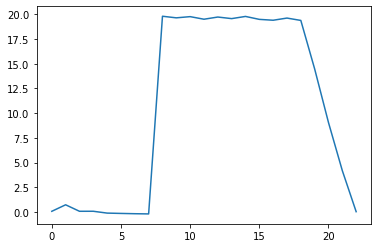

In [123]:
max_der2 = np.max(np.abs(der2))
large = np.where(np.abs(der2) > max_der2/2)[0]
gaps = np.diff(large) > 5
begins = np.insert(large[1:][gaps], 0, large[0])
ends = np.append(large[:-1][gaps], large[-1])
changes = ((begins+ends)/2).astype(np.int)
plt.plot(Serie['serie'])
plt.plot(changes, Serie[changes], 'ro')


In [125]:
from sklearn.cluster import DBSCAN

In [127]:
Serie.shape

(23, 2)

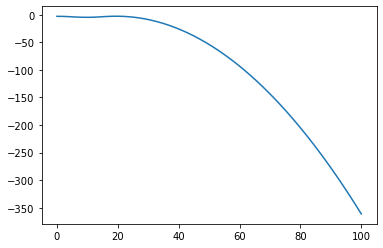

In [131]:
%matplotlib inline
import numpy as np
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot

#a = array([10,11,9,23,21,11,45,20,11,12]).reshape(-1, 1)

kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(np.array(Serie['serie']).reshape(-1, 1))
s = np.linspace(0,100)
e = kde.score_samples(s.reshape(-1,1))
plot(s, e)

In [24]:
db = DBSCAN(eps=0.05).fit(Serie)

In [25]:
db.labels_

array([ 0, -1,  0, -1, -1,  0,  0,  0,  0, -1,  1,  2,  2, -1,  1,  3, -1,
        9,  2,  2,  2,  4,  2,  4,  1, -1, -1,  0, -1, -1,  5,  5, -1,  0,
        0,  0, -1, -1,  4,  5, -1, -1,  0, -1,  0, -1,  6,  6,  5, -1,  0,
        0,  5,  2,  5,  0,  5,  2,  2,  4,  6, -1, -1,  9, -1,  5, -1,  2,
        3,  9,  8,  7,  2, -1, -1, -1, -1,  7,  8,  2,  9,  3, -1,  7,  2,
       -1,  7, -1, -1,  7, -1,  9,  2,  8, -1, -1,  3,  1,  2, -1,  9,  7,
       -1,  2, -1,  9,  7,  8, -1, -1,  3,  3,  4,  4,  5,  5,  7,  7, -1,
       -1,  8,  8,  2,  2,  2,  2,  2,  3,  3,  5,  5,  4,  2,  3,  3, -1,
        2, -1,  2,  8,  2,  5,  8, -1,  8,  4, -1,  5,  9,  2,  2, -1,  9,
        6,  2, -1,  4,  2,  1,  4, -1,  2, -1,  4, -1,  2])

In [8]:
# Avec le kernel density estimation on cherche les minima et maximal locaux pour splitter
# pas besoin de définir k

from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])

Minima: [5.10204082]
Maxima: [ 1.02040816 19.3877551 ]


In [14]:
mi

array([5])

In [15]:
print(a[a < s[mi][0]], a[(a >= s[mi][0]) * (a <= s[mi][1])], a[a >= s[mi][1]])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
plot(s[:mi[0]+1], e[:mi[0]+1], 'r',
     s[mi[0]:mi[1]+1], e[mi[0]:mi[1]+1], 'g',
     s[mi[1]:], e[mi[1]:], 'b',
     s[ma], e[ma], 'go',
     s[mi], e[mi], 'ro')